# Rotation test

Text(0.5, 0, 'z')

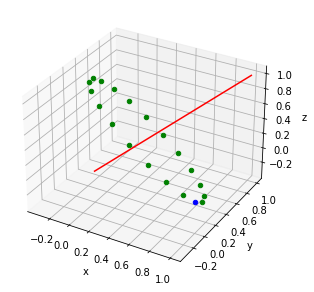

In [98]:
from python.quaternion import Quaternion
import matplotlib.pyplot as plt
import numpy as np


plt.figure()
ax = plt.subplot(projection='3d')

# rotation axis
axis = [1, 1, 1]
point = [1, 0, 0]

ax.plot([0, axis[0]], [0, axis[1]], [0, axis[2]], c='r')
ax.scatter(point[0], point[1], point[2], c='b')

N = 20
for k in range(1, N):
    qr = Quaternion()
    qr.set_axis_angle(axis[0], axis[1], axis[2], 2.0 * np.pi / N * k)
    p = Quaternion([0, point[0], point[1], point[2]])
    p2 = p.rotate(qr)
    
    ax.scatter(p2[1], p2[2], p2[3], c='g')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


[[ 0.3333333 ]
 [ 0.91068363]
 [-0.24401693]]
R
[[ 0.33333331 -0.24401692  0.91068363]
 [ 0.91068363  0.33333331 -0.24401692]
 [-0.24401692  0.91068363  0.33333331]]
R2
[[ 0.33333328 -0.24401693  0.91068363]
 [ 0.91068363  0.33333328 -0.24401693]
 [-0.24401693  0.91068363  0.33333328]]


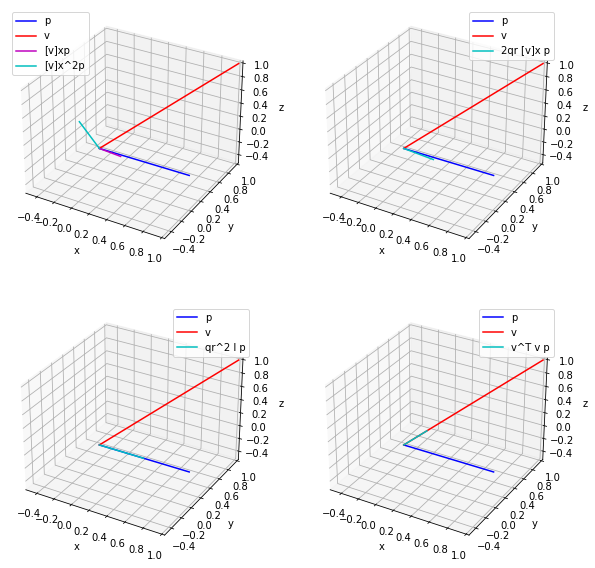

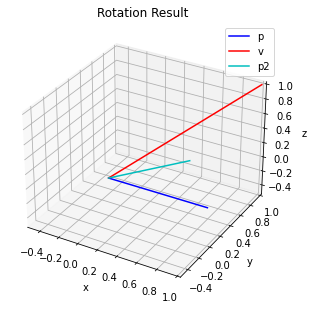

In [99]:
# Visualize rotation
from python.quaternion import Quaternion
import matplotlib.pyplot as plt
import numpy as np

# rotation axis
axis = [1, 1, 0.5]
point = [1, 0, 0]

def draw_vect(ax, x, y, z, color, label=''):
    ax.plot([0, x], [0, y], [0, z], c=color, label=label)


plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
plt.title('Rotation around (1,1,1/2) by pi/2')
ax = plt.subplot(221, projection='3d')

draw_vect(ax, point[0], point[1], point[2], 'b', 'p')
draw_vect(ax, axis[0], axis[1], axis[2], 'r', 'v')

qrot = Quaternion()
qrot.set_axis_angle(axis[0], axis[1], axis[2], np.pi/2)
qr = qrot.q[0]
v = qrot.q[1:]

vx = np.array([
    [0,     -v[2],  v[1]],
    [v[2],      0, -v[0]],
    [-v[1],  v[0],     0],
])

p = np.array(point).reshape((3,1))
v = np.array(v).reshape((1,3))

vxp = np.matmul(vx, p)
vx2p = np.matmul(vx, vxp)

draw_vect(ax, vxp[0,0], vxp[1,0], vxp[2,0], 'm', '[v]xp')
draw_vect(ax, vx2p[0,0], vx2p[1,0], vx2p[2,0], 'c', '[v]x^2p')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.5,1)
ax.set_zlim(-0.5,1)
plt.legend()

# plt.figure()
ax = plt.subplot(222, projection='3d')

draw_vect(ax, point[0], point[1], point[2], 'b', 'p')
draw_vect(ax, axis[0], axis[1], axis[2], 'r', 'v')

two_qrvxp = 2.0*qr*np.matmul(vx, p)
draw_vect(ax, two_qrvxp[0,0], two_qrvxp[1,0], two_qrvxp[2,0], 'c', '2qr [v]x p')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.5,1)
ax.set_zlim(-0.5,1)
plt.legend()

# plt.figure()
ax = plt.subplot(223, projection='3d')

draw_vect(ax, point[0], point[1], point[2], 'b', 'p')
draw_vect(ax, axis[0], axis[1], axis[2], 'r', 'v')

qr2Ip = qr**2 * p
draw_vect(ax, qr2Ip[0,0], qr2Ip[1,0], qr2Ip[2,0], 'c', 'qr^2 I p')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.5,1)
ax.set_zlim(-0.5,1)
plt.legend()

# plt.figure()
ax = plt.subplot(224, projection='3d')

draw_vect(ax, point[0], point[1], point[2], 'b', 'p')
draw_vect(ax, axis[0], axis[1], axis[2], 'r', 'v')

vtv = np.matmul(v.T, v)
vtvp = np.matmul(vtv, p)

draw_vect(ax, vtvp[0,0], vtvp[1,0], vtvp[2,0], 'c', 'v^T v p')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.5,1)
ax.set_zlim(-0.5,1)
plt.legend()

p2 = vtvp + qr2Ip + two_qrvxp + vx2p
print(p2)

plt.rcParams['figure.figsize'] = [5, 5]
plt.figure()
ax = plt.subplot(projection='3d')

draw_vect(ax, point[0], point[1], point[2], 'b', 'p')
draw_vect(ax, axis[0], axis[1], axis[2], 'r', 'v')
draw_vect(ax, p2[0], p2[1], p2[2], 'c', 'p2')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.5,1)
ax.set_zlim(-0.5,1)
plt.legend()
plt.title('Rotation Result')

print('R')
print(qrot.to_rotation_matrix())

I = np.eye(3)
R2 = np.matmul(v.T, v) + qr*qr*I + 2.0*qr*vx + np.matmul(vx, vx)

print('R2')
print(R2)

